# Ejercicio de programación Regresión Lineal Multiple

In [37]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [38]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Del data set usaremos 10 columnas para la regresion, el resto las eliminaremos como también eliminaremos la fila 1
Selecionaremos los valores para x como para y
Obtendremos la cantidad de ejemplos imprimir X, y, y m para verificar, Imprimir algunos puntos de datos

In [39]:
# Cargar datos
#Cargar desde la carpeta
#data = np.genfromtxt('Ptichers_Adjusted_Salary.csv', delimiter=',')
data = np.genfromtxt('/content/gdrive/Othercomputers/Mi portátil/6to Semetre Original/IA/labs/lab2/Ptichers_Adjusted_Salary.csv', delimiter=',')

data_sin_primera_fila = np.delete(data, 0, axis=0)

# Lista de columnas a eliminar (ajustada para mantener las columnas relevantes)
columnas_a_eliminar = [0, 2, 4, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

data = np.delete(data_sin_primera_fila, columnas_a_eliminar, axis=1)

# Verificar la cantidad de columnas restantes
cantidad_columnas = data.shape[1]
print(f"La cantidad de columnas restantes es: {cantidad_columnas}")

# Asegurarse de que X tenga 9 columnas y y tenga 1 columna
X = data[:, :-1]  # Selecciona todas menos la última columna (ERA)
y = data[:, -1]   # Selecciona la última columna (ERA) como variable dependiente

# Obtener la cantidad de ejemplos
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(20):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

La cantidad de columnas restantes es: 10
16115
  X[:,0] X[:, 1]         y
--------------------------
    1985  870000        47
    1985  550000       134
    1985  633333        49
    1985  150000        41
    1985  483333        37
    1985  772000        66
    1985  407500       107
    1985  275000        28
    1985  450000        57
    1985 1354167        52
    1985  625000       135
    1985  437500        93
    1985  641667        42
    1985  560000        68
    1985  440000        47
    1985  547143        86
    1985  581250        77
    1985  115000        64
    1985  177500       154
    1985  580000        55


creamos una copia del conjunto de datos original para no modificar los datos originale, Inicializa un array de ceros para las medias (mu) de cada columna, Inicializa un array de ceros para las desviaciones estándar (sigma) de cada columna, Calcula la media de cada columna (característica) en el conjunto de datos, Calcula la desviación estándar de cada columna (característica) en el conjunto de datos, Normaliza cada característica restando la media y dividiendo por la desviación estándar, Devuelve el conjunto de datos normalizado, las medias y las desviaciones estándar
     

In [40]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [41]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.9850000e+03 8.7000000e+05 2.2100000e+02 ... 2.2100000e+02
  8.4000000e+01 1.0000000e+01]
 [1.9850000e+03 5.5000000e+05 6.2000000e+02 ... 6.2000000e+02
  1.9800000e+02 1.7000000e+01]
 [1.9850000e+03 6.3333300e+05 3.8300000e+02 ... 3.8300000e+02
  1.3000000e+02 8.0000000e+00]
 ...
 [2.0160000e+03 2.2142857e+07 6.8500000e+02 ... 6.8500000e+02
  1.6500000e+02 3.1000000e+01]
 [2.0160000e+03 1.0400000e+07 4.4300000e+02 ... 4.4300000e+02
  1.1900000e+02 1.5000000e+01]
 [2.0160000e+03 5.2490000e+05 2.0100000e+02 ... 2.0100000e+02
  5.1000000e+01 5.0000000e+00]]
Media calculada: [2.00130897e+03 1.95312092e+06 2.29220726e+02 4.77511635e+00
 6.85696556e-01 4.34582687e+00 2.29224201e+02 7.62678250e+01
 8.37921191e+00]
Desviación estandar calculada: [8.78862921e+00 3.11146493e+06 1.94060879e+02 5.33253510e+00
 1.03572707e+00 4.59781617e+00 1.94057105e+02 6.41495258e+01
 7.69053815e+00]
[[-1.85568948 -0.34810642 -0.04236158 ... -0.04238031  0.12053363
   0.21075093]
 [-1.85568948 -0.45095187  2.

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [42]:
# Añade el termino de interseccion a X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [43]:
print(X)

[[ 1.         -1.85568948 -0.34810642 ... -0.04238031  0.12053363
   0.21075093]
 [ 1.         -1.85568948 -0.45095187 ...  2.01371549  1.89763172
   1.12096032]
 [ 1.         -1.85568948 -0.42416931 ...  0.7924255   0.8376083
  -0.04930889]
 ...
 [ 1.          1.67159552  6.48882006 ...  2.34866844  1.38320859
   2.94137909]
 [ 1.          1.67159552  2.71475953 ...  1.10161284  0.66613392
   0.86090049]
 [ 1.          1.67159552 -0.45901881 ... -0.14544276 -0.39388951
  -0.43939863]]


calcula el costo (o error) de un modelo de regresión lineal multivariable dado un conjunto de datos, los parámetros actuales del modelo (theta), y los valores reales de salida (y), m son los valores de entrenamiento ,J como costo inicia en 0, La fórmula general para la función de costo en la regresión lineal es la que se esta usando en j

In [44]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

descenso por gradiente para un modelo de regresión lineal multivariable (también conocida como regresión lineal múltiple), alpha valor de aprendisaje, num_iters numero de iteraciones, tetha vector de parametro, se crea una copia de tetha para no modificar la original, calcula el erroe entre las predicciones y el valor real, (alpha / m) * (np.dot(X, theta) - y).dot(X): Multiplica el error por la tasa de aprendizaje alpha y por la matriz de características X, escalada por el número de ejemplos m. Este término ajusta theta en la dirección que minimiza el error.

In [45]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


inicializamos theta con la cantidad de columnas de x, llamamos a gradientedescens, imprimimos el costo y el desenzo de la gradiente, damos valores a X_array y al final calculamos el precio

Costo final después del descenso por gradiente: 174.5684
theta calculado por el descenso por el gradiente: [56.0137277   4.3031669   2.05049129 13.6619033  -3.8022018   0.26472173
 13.34797711 22.56930064 -0.16046005 -0.20287894]
(10,)
El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $6709


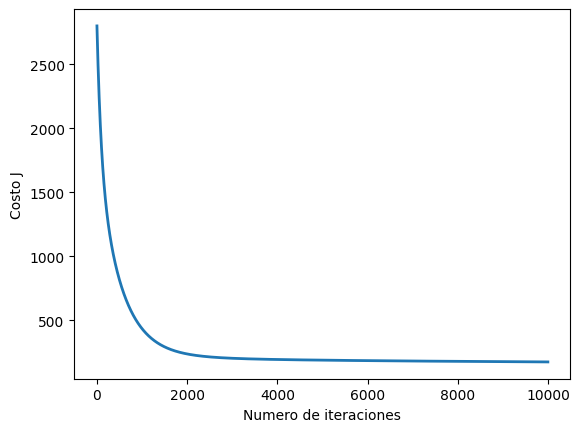

In [46]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
print('Costo final después del descenso por gradiente: {:.4f}'.format(J_history[-1]))
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 1650, 3]
X_array[2:9] = (X_array[2:9] - mu) / sigma
X_array = X_array[:10]
print(theta.shape)
price = np.dot(X_array, theta)   # Se debe cambiar esto
print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))